## Statistics Functions Solutions

1. Create a single plot of the pdf of a normal distribution with mean=0
   and standard deviation ranging from 1 to 3.  Plot this on the range
   from -10 to 10.

2. Create a scaled normal distribution object with mean=20.0,
   and standard deviation=3.

3. Plot this distribution's pdf and cdf side by side in two separate plots.

4. Get 5000 random variable samples from the distribution, and use
   the stats.norm.fit method to estimate its parameters.
   Plot the histogram of the random variables as well as the
   pdf for the estimated distribution.

estimate of mean, std: 20.0446715025 2.99111807617


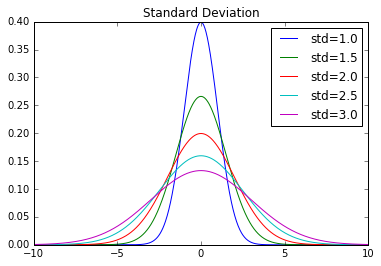

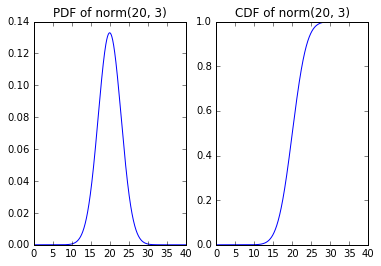

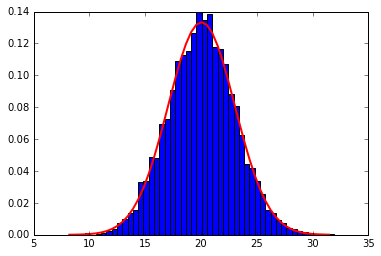

In [3]:
from numpy import linspace, arange
from scipy.stats import norm, histogram

from matplotlib.pylab import plot, clf, show, figure, legend, \
                             title, subplot, bar, hist
%matplotlib inline

x = linspace(-10,10, 1001)

# 1. Create a single plot with the pdf of a normal distribution with
#    mean=0 and std ranging from 1 to 3.  Plot this on the range from
#    -10 to 10.
for std in linspace(1, 3, 5):
    plot(x, norm.pdf(x, scale=std), label="std=%s" % std)
legend()    
title("Standard Deviation")    

# 2. Create a scaled normal distribution object with mean=20.0,
#    and standard devation=3.
my_dist = norm(20.0, 3.0)
   
# 3. Plot this distribution's pdf and cdf side by side in two
#    separate plots.
x = linspace(0, 40, 1001)

figure()
subplot(1,2,1)
plot(x, my_dist.pdf(x))
title("PDF of norm(20, 3)")
    
subplot(1,2,2)
plot(x, my_dist.cdf(x))
title("CDF of norm(20, 3)")

# 4. Get 5000 random variable samples from the distribution, and use
#    the stats.norm.fit method to estimate its parameters.
#    Plot the histogram of the random variables as well as the
#    pdf for the estimated distribution.
random_values = my_dist.rvs(5000)

# Calculate the histogram using stats.histogram.
num_bins = 50
bin_counts, min_bin, bin_width, outside = histogram(random_values, 
                                                    numbins=num_bins)
bin_x = min_bin + bin_width * arange(num_bins)
# Normalize the bin counts so that they integrate to 1.0
hist_pdf = bin_counts/(len(random_values)*bin_width)
 
mean_est, std_est = norm.fit(random_values)
print "estimate of mean, std:", mean_est, std_est

figure()
bar(bin_x, hist_pdf, width=bin_width)

# or use pylab.hist...
#hist(random_values, bins=50, normed=True)

plot(bin_x, norm(mean_est, std_est).pdf(bin_x), 'r', linewidth=2)
show()